In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

%matplotlib inline

This example uses matplotlib 2.0

In [2]:
#%matplotlib widget
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:24:11) 
[GCC 9.4.0] 

Matplotlib version is 3.5.1 

Matplotlibrc file is matplotlibrc



and the matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
please suggest improvements

## A few notes

* All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

* Using a uniform style is very important for an attractive manuscript. Try to avoid ad-hoc changes to the settings. 

* If you feel that there is a desirable change, consider applying it to the whole manuscript, preferably by setting some edits to the rc file right at the start of the script/notebook. e.g. mpl.rc('font', size=10). 

## Create figure

* The width of a figure should always be set to the real physical column width. e.g. 3+3/8 inches for a PRL column. This will mean that fonts appear on the page in the correct size.

* Gridspec and subplots_adjust are useful to set the precise location of panels.

* Including 2-4 minor ticks per major tick is usually good.

* Putting the colorbar on separate axes facilities better control over its location. 

* Saving in pdf creates vector graphics and fast performance within pdflatex.

In [3]:
q_c  = np.linspace(0, 1)
I = np.sin(q_c*np.pi)**2

c = 20.88
d = 4.07


def q_c_to_L(q_c):
    L = (q_c + 5.)*c/d
    return L


def convert_ax_q_L(ax_q_c):
    """
    Update second axis according with first axis.
    """
    x1, x2 = ax_q_c.get_xlim()
    ax_L.set_xlim(q_c_to_L(x1), q_c_to_L(x2))
    ax_L.figure.canvas.draw()

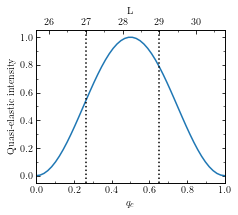

In [4]:
fig, ax_q_c = plt.subplots(figsize=(3+3/8, 2.8))
ax_L = ax_q_c.twiny()

ax_q_c.callbacks.connect("xlim_changed", convert_ax_q_L)

ax_q_c.plot(q_c, I)
ax_q_c.set_xlim(0, 1)

ax_q_c.set_xlabel(r'$q_c$')
ax_q_c.set_ylabel('Quasi-elastic intensity')
ax_L.set_xlabel('L')

for ax in [ax_q_c, ax_L]:
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

ax_L.axvline(27, color='k', linestyle=':')
ax_L.axvline(29, color='k', linestyle=':')

fig.savefig('ex_19_two_units.pdf', dpi=1200)